In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")     #wont show warnings 

In [4]:
beml_df = pd.read_csv("BEML.csv")   #to read csv files
beml_df.head(5)    #count 1st five

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [5]:
beml_df.shape   #row/col

(1739, 8)

In [7]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [8]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [11]:
beml_df


,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [12]:
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [15]:
beml_df.dtypes

Date      object
Close    float64
dtype: object

In [17]:
glaxo_df.dtypes

Date      object
Close    float64
dtype: object

In [23]:
glaxo_df['Date'].nunique()   #to find duplicates

1739

In [24]:
glaxo_df.drop_duplicates()  #to remove duplicates

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


In [18]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))


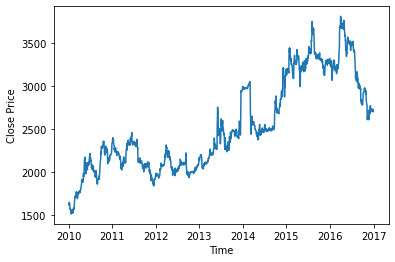

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

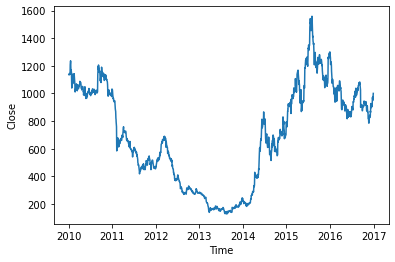

In [20]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [25]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)   #to calculate gain
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [27]:
glaxo_df.head()    #nan is null or no data   gain=c-cp/cp

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [28]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

In [29]:
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


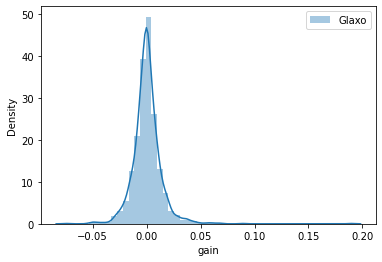

In [30]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

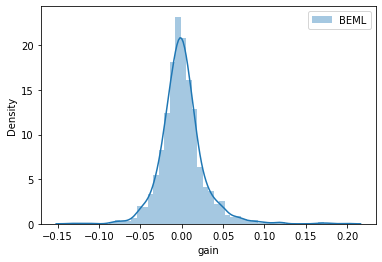

In [31]:
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

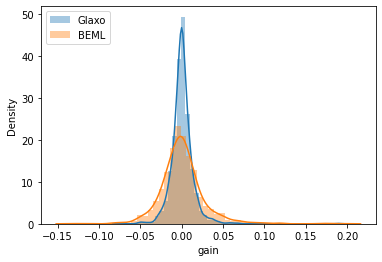

In [33]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend(loc="upper left")

In [34]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [35]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [36]:
from scipy import stats   #to perform ND,SD...
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
glaxo_df.gain.mean(),
glaxo_df.gain.std())

0.06352488667177397

In [37]:
stats.norm.cdf( -0.02,
beml_df.gain.mean(),
beml_df.gain.std())

0.22155987503755292

In [38]:
#Probability of making 2% gain or higher in Glaxo
1 - stats.norm.cdf(0.02,
glaxo_df.gain.mean(),
glaxo_df.gain.std())

0.07104511457618568

In [39]:
1 - stats.norm.cdf(0.02,
beml_df.gain.mean(),
beml_df.gain.std())

0.22769829484075343